/var/folders/kp/d7tzsf357d51hw6h96hs9xsc0000gn/T/ipykernel_2985/3102073623.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean().dropna()



📊 Model Evaluation Metrics:
MAE : 0.3694
RMSE: 0.5289
R²  : 0.4943

⭐ Feature Importance:
                 Feature  Importance
0    Global_active_power    0.639855
3                   hour    0.120634
1  Global_reactive_power    0.112404
2                Voltage    0.110858
4             is_weekend    0.016250


/var/folders/kp/d7tzsf357d51hw6h96hs9xsc0000gn/T/ipykernel_2985/3102073623.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


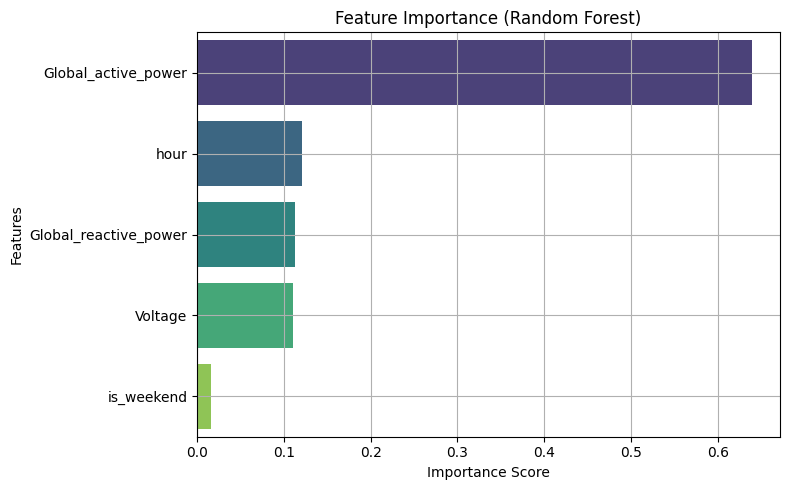

/var/folders/kp/d7tzsf357d51hw6h96hs9xsc0000gn/T/ipykernel_2985/3102073623.py:105: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/rajeshkumar/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


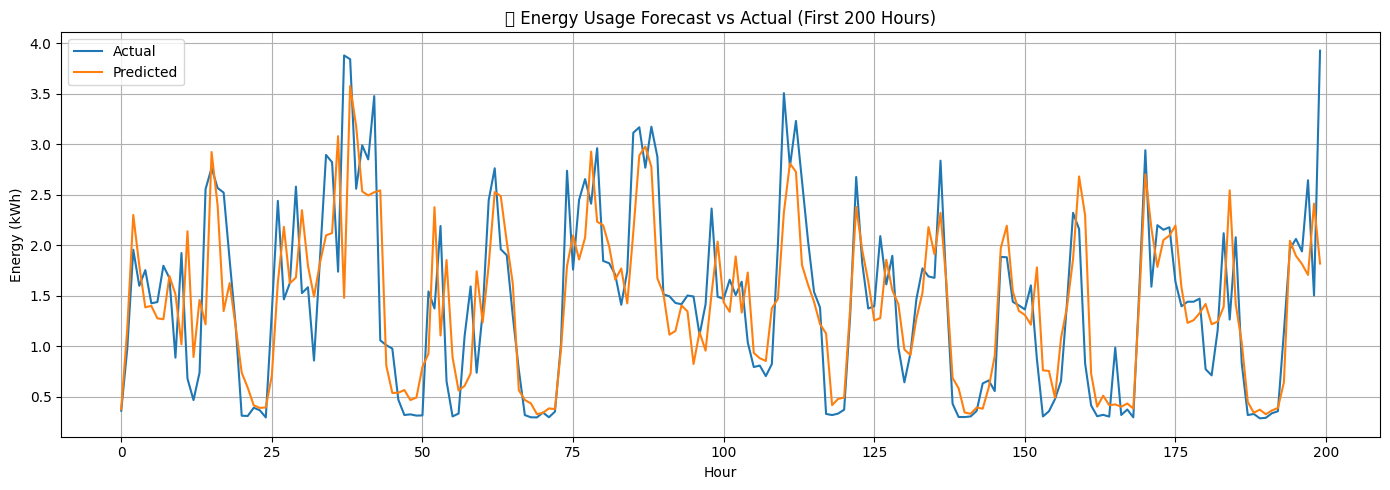

/var/folders/kp/d7tzsf357d51hw6h96hs9xsc0000gn/T/ipykernel_2985/3102073623.py:115: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/rajeshkumar/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


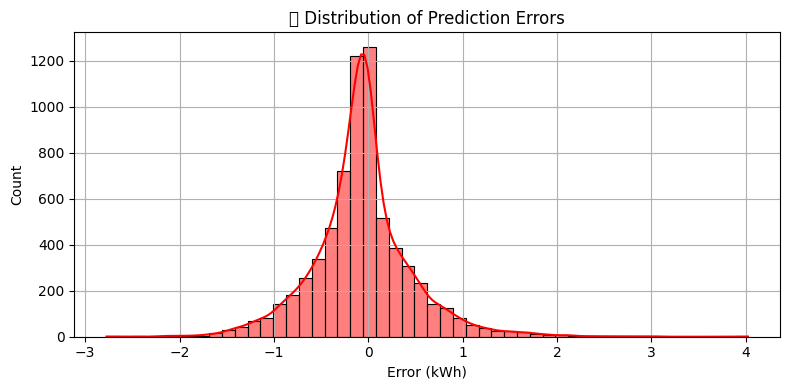

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# --------------------------
# 1. Load and preprocess data
# --------------------------
df = pd.read_csv('/Users/rajeshkumar/Desktop/powerplus/household_power_consumption.txt', sep=';', low_memory=False)

# Parse datetime
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(columns=['Date', 'Time'], inplace=True)
df.set_index('datetime', inplace=True)

# Convert to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Resample to hourly average
df = df.resample('H').mean().dropna()

# Feature engineering
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

# --------------------------
# 2. Model Training
# --------------------------
df['target'] = df['Global_active_power'].shift(-1)  # Predict next hour

df.dropna(inplace=True)

# Features and Target
X = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'hour', 'is_weekend']]
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# --------------------------
# 3. Evaluation Metrics
# --------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation Metrics:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

# --------------------------
# 4. Feature Importance
# --------------------------
importances = model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n⭐ Feature Importance:")
print(feature_df)

# Plot feature importances
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------
# 5. Visualization Quality
# --------------------------

# Plot Actual vs Predicted
plt.figure(figsize=(14,5))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.title("🔮 Energy Usage Forecast vs Actual (First 200 Hours)")
plt.xlabel("Hour")
plt.ylabel("Energy (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution of prediction errors
errors = y_test - y_pred
plt.figure(figsize=(8,4))
sns.histplot(errors, bins=50, kde=True, color='red')
plt.title("📉 Distribution of Prediction Errors")
plt.xlabel("Error (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()
